**Assignment-12: TensorFlow and Keras: Build various MLP architectures for MNIST dataset [M]**

**Objective**: Model with three different architecture:

1) 2-Hidden layer architecture (784-520-120-10 architecture)

2) 3-Hidden layer architecture (784-350-150-140-10 architecture)

3) 5-Hidden layer architecture (784-250-150-140-60-40-10 architecture)

Train-Test error plot

Activation='relu'+ Adam Optimizer+Batch_Normalization +Drop_out

In [3]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="validation loss")
  ax.plot(x, ty, 'r', label="train loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


In [6]:
# the data, shuffled and split between train and test sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
print("Number of training examples:", x_train.shape[0], "and each image is of shape[%d,%d]"%(x_train.shape[1], x_train.shape[2]))
print("Number of testing examples:", x_test.shape[0], "and each image is of shape[%d,%d]"%(x_test.shape[1], x_test.shape[2]))

Number of training examples: 60000 and each image is of shape[28,28]
Number of testing examples: 10000 and each image is of shape[28,28]


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [9]:
# after converting the input images from 3d to 2d vectors
print("Number of training examples:", x_train.shape[0], "and each image is of shape[%d]"%(x_train.shape[1]))
print("Number of testing examples:", x_test.shape[0], "and each image is of shape[%d]"%(x_test.shape[1]))


Number of training examples: 60000 and each image is of shape[784]
Number of testing examples: 10000 and each image is of shape[784]


In [10]:
# An example data point
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

x_train = x_train/255
x_test = x_test/255

In [12]:
# example data point after normlizing
print(x_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [13]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Softmax classifier**

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax

from keras.models import Sequential
from keras.layers import Dense, activations
from keras.initializers import he_normal



In [0]:
# some model parameters

output_dim=10
input_dim=x_train.shape[1]
batch_size = 128
np_epoch = 20

**1)** **2-Hidden layer architecture (784-520-120-10 architecture)**

**MLP + ReLU + ADAM**

In [17]:
model_relu = Sequential()
model_relu.add(Dense(520, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(120, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 520)               408200    
_________________________________________________________________
dense_5 (Dense)              (None, 120)               62520     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1210      
Total params: 471,930
Trainable params: 471,930
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=np_epoch, verbose=1, validation_data=(x_test, y_test))

W0812 12:46:32.699859 140119383185280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2401 - acc: 0.9293 - val_loss: 0.1110 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0863 - acc: 0.9736 - val_loss: 0.0782 - val_acc: 0.9763
Epoch 3/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0532 - acc: 0.9840 - val_loss: 0.0824 - val_acc: 0.9760
Epoch 4/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0364 - acc: 0.9884 - val_loss: 0.0749 - val_acc: 0.9765
Epoch 5/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0268 - acc: 0.9917 - val_loss: 0.0615 - val_acc: 0.9805
Epoch 6/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0211 - acc: 0.9934 - val_loss: 0.0759 - val_acc: 0.9780
Epoch 7/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0175 - acc: 0.9946 - val_loss: 0.0805 - 

Test score: 0.09527517495716156
Test accuracy: 0.9814


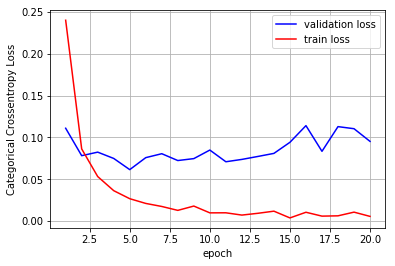

In [22]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
score1=score[0]
score2=score[1]
train_acc1=history.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,np_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**1.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer**

In [24]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(520, activation='relu', 
                      input_shape=(input_dim,),
                      kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(120, activation='relu', 
                      kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 520)               408200    
_________________________________________________________________
batch_normalization_3 (Batch (None, 520)               2080      
_________________________________________________________________
dense_11 (Dense)             (None, 120)               62520     
_________________________________________________________________
batch_normalization_4 (Batch (None, 120)               480       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1210      
Total params: 474,490
Trainable params: 473,210
Non-trainable params: 1,280
_________________________________________________________________


In [25]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history2 = model_batch.fit(x_train, y_train, 
                           batch_size=batch_size,
                           epochs=np_epoch, verbose=1, 
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1900 - acc: 0.9437 - val_loss: 0.1129 - val_acc: 0.9649
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0690 - acc: 0.9796 - val_loss: 0.0825 - val_acc: 0.9756
Epoch 3/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0471 - acc: 0.9855 - val_loss: 0.0849 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0326 - acc: 0.9898 - val_loss: 0.0870 - val_acc: 0.9750
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0253 - acc: 0.9921 - val_loss: 0.0855 - val_acc: 0.9745
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0214 - acc: 0.9929 - val_loss: 0.0866 - val_acc: 0.9749
Epoch 7/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0172 - acc: 0.9946 - val_loss: 0.0756 - 

Test score: 0.08921608887573093
Test accuracy: 0.9798


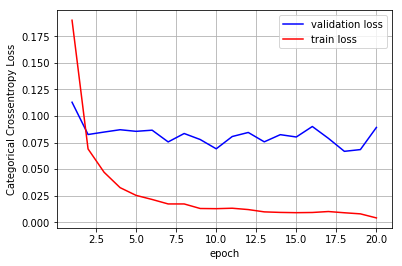

In [26]:
score = model_batch.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
score3=score[0]
score4=score[1]
train_acc2=history.history['acc']

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,np_epoch+1))


vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)

**1.3 MLP + Dropout + AdamOptimizer**

In [27]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(520, activation='relu',
                     input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(120, activation='relu',
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

W0812 12:51:49.495560 140119383185280 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 520)               408200    
_________________________________________________________________
batch_normalization_5 (Batch (None, 520)               2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 520)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               62520     
_________________________________________________________________
batch_normalization_6 (Batch (None, 120)               480       
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1210      
Total para

In [28]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history3 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=np_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.4364 - acc: 0.8686 - val_loss: 0.1410 - val_acc: 0.9578
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2066 - acc: 0.9384 - val_loss: 0.1062 - val_acc: 0.9666
Epoch 3/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.1611 - acc: 0.9518 - val_loss: 0.0879 - val_acc: 0.9708
Epoch 4/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.1355 - acc: 0.9594 - val_loss: 0.0799 - val_acc: 0.9759
Epoch 5/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.1236 - acc: 0.9624 - val_loss: 0.0759 - val_acc: 0.9749
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1081 - acc: 0.9667 - val_loss: 0.0750 - val_acc: 0.9764
Epoch 7/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.1017 - acc: 0.9686 - val_loss: 0.0713 - 

Test score: 0.05763858468532999
Test accuracy: 0.9839


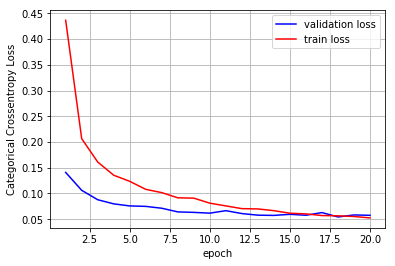

In [29]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
score5=score[0]
score6=score[1]
train_acc3=history.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

vy3 = history3.history['val_loss']
ty3 = history3.history['loss']
plt_dynamic(x, vy3, ty3, ax)

2) **3-Hidden layer architecture (784-350-150-140 architecture)**

**2.1 MLP + ReLU + ADAM**

In [30]:
model_relu = Sequential()
model_relu.add(Dense(350, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(150, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(140, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history21 = model_relu.fit(x_train, y_train, 
                         batch_size=batch_size, 
                         epochs=np_epoch, verbose=1, 
                         validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 350)               274750    
_________________________________________________________________
dense_17 (Dense)             (None, 150)               52650     
_________________________________________________________________
dense_18 (Dense)             (None, 140)               21140     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1410      
Total params: 349,950
Trainable params: 349,950
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2430 - acc: 0.9288 - val_loss: 0.1048 - val_acc: 0.9656
Epoch 2/20
60000/60000 [==============================] - 5s 80us/step - los

Test score: 0.09163313647549334
Test accuracy: 0.9802


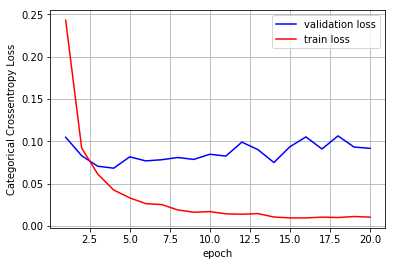

In [31]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
score7=score[0]
score8=score[1]
train_acc4=history.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,np_epoch+1))


vy21 = history21.history['val_loss']
ty21 = history21.history['loss']
plt_dynamic(x, vy21, ty21, ax)

**2.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer**

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(350, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(150, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(140, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


In [33]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history21 = model_batch.fit(x_train, y_train, 
                           batch_size=batch_size,
                           epochs=np_epoch, verbose=1, 
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.4989 - acc: 0.8521 - val_loss: 1.2022 - val_acc: 0.7384
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.3064 - acc: 0.9127 - val_loss: 0.6080 - val_acc: 0.8366
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2869 - acc: 0.9185 - val_loss: 0.5661 - val_acc: 0.8500
Epoch 4/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2756 - acc: 0.9227 - val_loss: 5.2494 - val_acc: 0.2476
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2726 - acc: 0.9225 - val_loss: 1.0495 - val_acc: 0.7228
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2684 - acc: 0.9245 - val_loss: 0.7402 - val_acc: 0.8057
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2643 - acc: 0.9256 - val_loss: 3.5711 - val_acc

In [35]:
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 784)               3136      
_________________________________________________________________
batch_normalization_8 (Batch (None, 784)               3136      
_________________________________________________________________
batch_normalization_9 (Batch (None, 784)               3136      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                7850      
Total params: 17,258
Trainable params: 12,554
Non-trainable params: 4,704
_________________________________________________________________


Test score: 2.194133190917969
Test accuracy: 0.6076


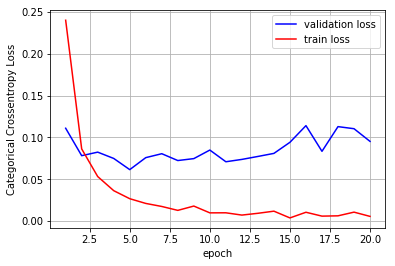

In [38]:
score = model_batch.evaluate(x_test, y_test, verbose=0) 
score9=score[0]
score10=score[1]
train_acc5=history.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax22 = plt.subplots(1,1)
ax22.set_xlabel('epoch') ; ax22.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,np_epoch+1))

vy22 = history.history['val_loss']
ty22 = history.history['loss']
plt_dynamic(x, vy22, ty22, ax22)

.**2.3 MLP + Dropout + AdamOptimizer**

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(350, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))

model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(150, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

                                                    
model_relu.add(Dense(140, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


In [40]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history23 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=np_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 131us/step - loss: 1.3739 - acc: 0.5679 - val_loss: 0.5116 - val_acc: 0.8778
Epoch 2/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.8615 - acc: 0.7184 - val_loss: 0.4473 - val_acc: 0.8911
Epoch 3/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.8370 - acc: 0.7257 - val_loss: 0.4432 - val_acc: 0.8919
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.8327 - acc: 0.7289 - val_loss: 0.4314 - val_acc: 0.8961
Epoch 5/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.8329 - acc: 0.7292 - val_loss: 0.4246 - val_acc: 0.8943
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.8218 - acc: 0.7315 - val_loss: 0.4228 - val_acc: 0.8946
Epoch 7/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.8269 - acc: 0.7311 - val_loss: 0.4262 - 

In [41]:
model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_10 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_4 (Dropout)          (None, 784)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 784)               3136      
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                7850      
Total para

Test score: 0.40487406046390534
Test accuracy: 0.9009


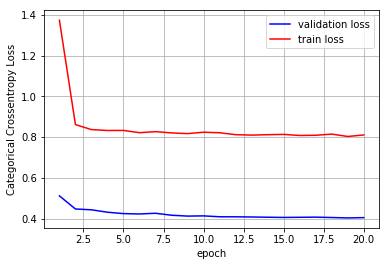

In [42]:
score = model_drop.evaluate(x_test, y_test, verbose=0)
score11=score[0]
score12=score[1]
train_acc6=history.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax23 = plt.subplots(1,1)
ax23.set_xlabel('epoch') ; ax23.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,np_epoch+1))


vy23 = history23.history['val_loss']
ty23 = history23.history['loss']
plt_dynamic(x, vy23, ty23, ax23)

3) **5-Hidden layer architecture (784-250-150-140-60-40-10 architecture)**

In [43]:
model_relu = Sequential()
model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_relu.add(Dense(150, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(140, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(60, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
                                                    
model_relu.add(Dense(40, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_29 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_30 (Dense)             (None, 140)               21140     
_________________________________________________________________
dense_31 (Dense)             (None, 60)                8460      
_________________________________________________________________
dense_32 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                410       
Total params: 266,350
Trainable params: 266,350
Non-trainable params: 0
_________________________________________________________________
None

In [44]:

model_relu.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history31 = model_relu.fit(x_train, y_train, 
                         batch_size=batch_size, 
                         epochs=np_epoch, verbose=1, 
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2786 - acc: 0.9150 - val_loss: 0.1209 - val_acc: 0.9622
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1029 - acc: 0.9692 - val_loss: 0.0918 - val_acc: 0.9719
Epoch 3/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0707 - acc: 0.9781 - val_loss: 0.1083 - val_acc: 0.9691
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0543 - acc: 0.9827 - val_loss: 0.0785 - val_acc: 0.9785
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0432 - acc: 0.9858 - val_loss: 0.0875 - val_acc: 0.9742
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0345 - acc: 0.9891 - val_loss: 0.0752 - val_acc: 0.9799
Epoch 7/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0765 - val_acc

Test score: 0.09510527819981962
Test accuracy: 0.9807


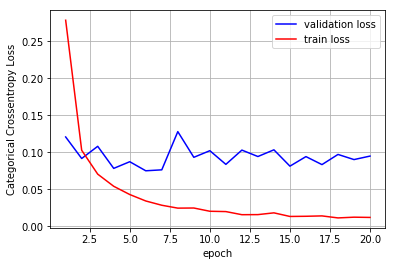

In [46]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
score13=score[0]
score14=score[1]
train_acc7=history.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax31 = plt.subplots(1,1)
ax31.set_xlabel('epoch') ; ax31.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,np_epoch+1))


vy31 = history31.history['val_loss']
ty31 = history31.history['loss']
plt_dynamic(x, vy31, ty31, ax31)

**[3.2 MLP + Batch-Norm on hidden Layers + AdamOptimizer ](https://)**

In [0]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_batch.add(BatchNormalization())
model_relu.add(Dense(150, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(140, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
model_relu.add(Dense(60, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())
                                                    
model_relu.add(Dense(40, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

In [52]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'])

history32 = model_batch.fit(x_train, y_train, 
                           batch_size=batch_size,
                           epochs=np_epoch, verbose=1, 
                           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.4878 - acc: 0.8567 - val_loss: 14.4612 - val_acc: 0.1028
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.3056 - acc: 0.9122 - val_loss: 14.2839 - val_acc: 0.1138
Epoch 3/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2881 - acc: 0.9179 - val_loss: 14.2790 - val_acc: 0.1141
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2762 - acc: 0.9206 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2726 - acc: 0.9229 - val_loss: 14.2871 - val_acc: 0.1136
Epoch 6/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.2691 - acc: 0.9246 - val_loss: 14.2855 - val_acc: 0.1137
Epoch 7/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.2650 - acc: 0.9264 - val_loss: 14.

In [53]:
model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_28 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_29 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_30 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_31 (Batc (None, 784)               3136      
_________________________________________________________________
batch_normalization_32 (Batc (None, 784)               3136      
_________________________________________________________________
dense_57 (Dense)             (None, 10)                7850      
Total params: 23,530
Trainable params: 15,690
Non-trainable params: 7,840
_________________________________________________________________


Test score: 14.28869146270752
Test accuracy: 0.1135


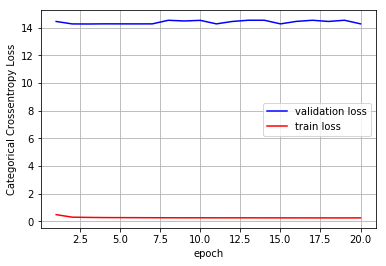

In [54]:
score = model_batch.evaluate(x_test, y_test, verbose=0) 
score15=score[0]
score16=score[1]
train_acc8=history.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax32 = plt.subplots(1,1)
ax32.set_xlabel('epoch') ; ax32.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,np_epoch+1))

vy32 = history32.history['val_loss']
ty32 = history32.history['loss']
plt_dynamic(x, vy32, ty32, ax32)

**3.3 MLP + Dropout + AdamOptimizer**

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()
model_relu.add(Dense(250, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=he_normal(seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(150, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(146, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
model_relu.add(Dense(60, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))
                                                    
model_relu.add(Dense(40, activation='relu', 
                     kernel_initializer=he_normal(seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

In [57]:
model_drop.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history33 = model_drop.fit(x_train, y_train,
                         batch_size=batch_size,
                         
                         epochs=np_epoch, verbose=1,
                         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 213us/step - loss: 2.1425 - acc: 0.3105 - val_loss: 1.0620 - val_acc: 0.8337
Epoch 2/20
60000/60000 [==============================] - 11s 176us/step - loss: 1.6054 - acc: 0.4423 - val_loss: 0.9691 - val_acc: 0.8431
Epoch 3/20
60000/60000 [==============================] - 11s 176us/step - loss: 1.5884 - acc: 0.4493 - val_loss: 0.9567 - val_acc: 0.8481
Epoch 4/20
60000/60000 [==============================] - 11s 176us/step - loss: 1.5982 - acc: 0.4481 - val_loss: 0.9538 - val_acc: 0.8460
Epoch 5/20
60000/60000 [==============================] - 10s 174us/step - loss: 1.5901 - acc: 0.4469 - val_loss: 0.9463 - val_acc: 0.8432
Epoch 6/20
60000/60000 [==============================] - 10s 173us/step - loss: 1.5879 - acc: 0.4517 - val_loss: 0.9451 - val_acc: 0.8479
Epoch 7/20
60000/60000 [==============================] - 10s 170us/step - loss: 1.5799 - acc: 0.4537 - val_loss: 0.

Test score: 0.931315202331543
Test accuracy: 0.8558


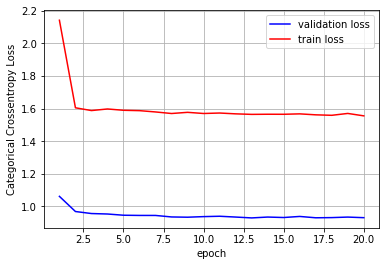

In [58]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
score17=score[0]
score18=score[1]
train_acc9=history.history['acc']
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax33 = plt.subplots(1,1)
ax33.set_xlabel('epoch') ; ax33.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,np_epoch+1))


vy33 = history33.history['val_loss']
ty33 = history33.history['loss']
plt_dynamic(x, vy33, ty33, ax33)

**Final observation:**

In [0]:
from prettytable import PrettyTable

In [0]:
models=['2_hidden_layer MLP+ReLu+Adam',
        '2_hidden_layer MLP+Relu+adam+BN',
        '2_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '3_hidden_layer MLP+ReLu+Adam',
        '3_hidden_layer MLP+Relu+adam+BN',
        '3_hidden_layer MLP+reLu+Adam+BN+Drop-out',
       '5_hidden_layer MLP+ReLu+Adam',
        '5_hidden_layer MLP+Relu+adam+BN',
        '5_hidden_layer MLP+reLu+Adam+BN+Drop-out']

In [0]:
training_accuracy=[train_acc1,train_acc2,train_acc3,train_acc4,
                   train_acc5,train_acc6,train_acc7,train_acc8,
                   train_acc9
                   
                  ]

In [0]:
test_score=[score1,score3,score5,score7,score9,score11,score13,score15,
           score17]

In [0]:
test_accuracy=[score2,score4,score6,score8,score10,score12,score14,
              score16,
              score18]
INDEX = [1,2,3,4,5,6,7,8,9]

In [66]:
# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TRAINING ACCURACY",training_accuracy)
Model_Performance.add_column("TESTING ACCURACY",test_accuracy)
Model_Performance.add_column("TEST SCORE",test_score)

# Printing the Model_Performance
print(Model_Performance)

+--------+------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+---------------------+
| INDEX. |                MODEL_NAME                |                                                                                                                                                       TRAINING ACCURACY                                                                                                                                                       | TESTING ACCURACY |      TEST SCORE     |
+--------+------------------------------------------+---------------------------------------------------------------------------------------------------------------------